In [26]:
import numpy as np
from numpy import pi, cos, sin
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy.fftpack import fftshift

fs = 64
ts = 1/fs
f0_1 = 3.4
f0_2 = 4
f0_3 = 5
f0_4 = 6
total_time = 1
N = np.arange(64)
x_1 = np.sin(2*np.pi*f0_1*N*ts)
x_2 = np.sin(2*np.pi*f0_2*N*ts)
x_3 = np.sin(2*np.pi*f0_3*N*ts)
x_4 = np.sin(2*np.pi*f0_3*N*ts)

plots = lambda: plt.subplots(figsize=(20,10))

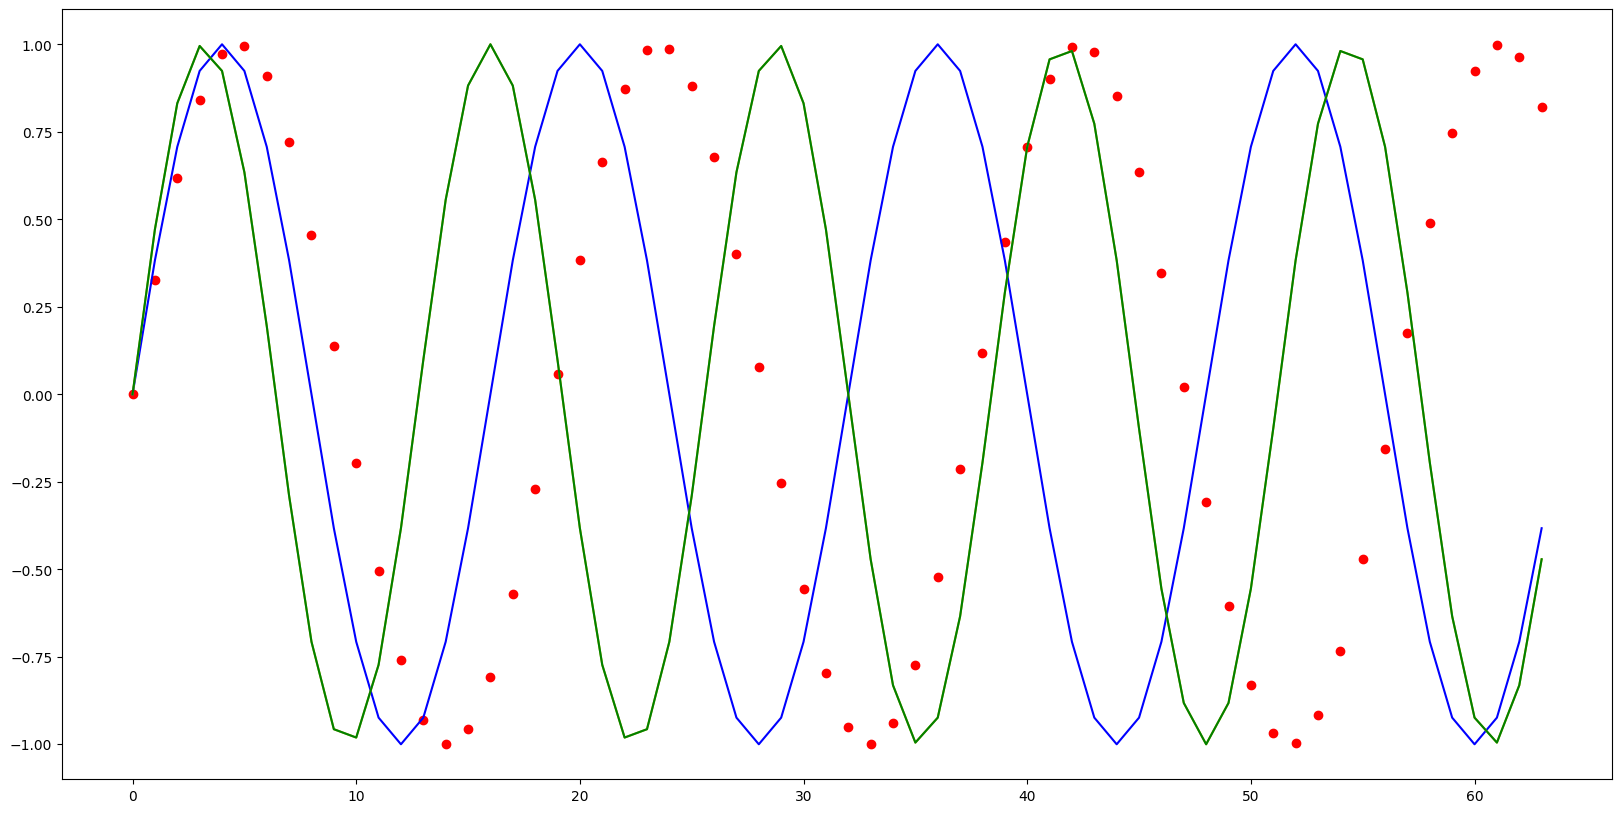

In [2]:
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(N, x_1, 'ro')
ax1.plot(N, x_2, 'b')
ax1.plot(N, x_3, 'y')
ax1.plot(N, x_4, 'g')
plt.show()


In [3]:
(x_1*x_1).sum() #A N/2

32.512908381806895

In [4]:
print((x_1*x_2).sum())
print((x_1*x_3).sum())
print((x_1*x_4).sum())


-5.374418269526543
-2.203077124151333
-2.203077124151333


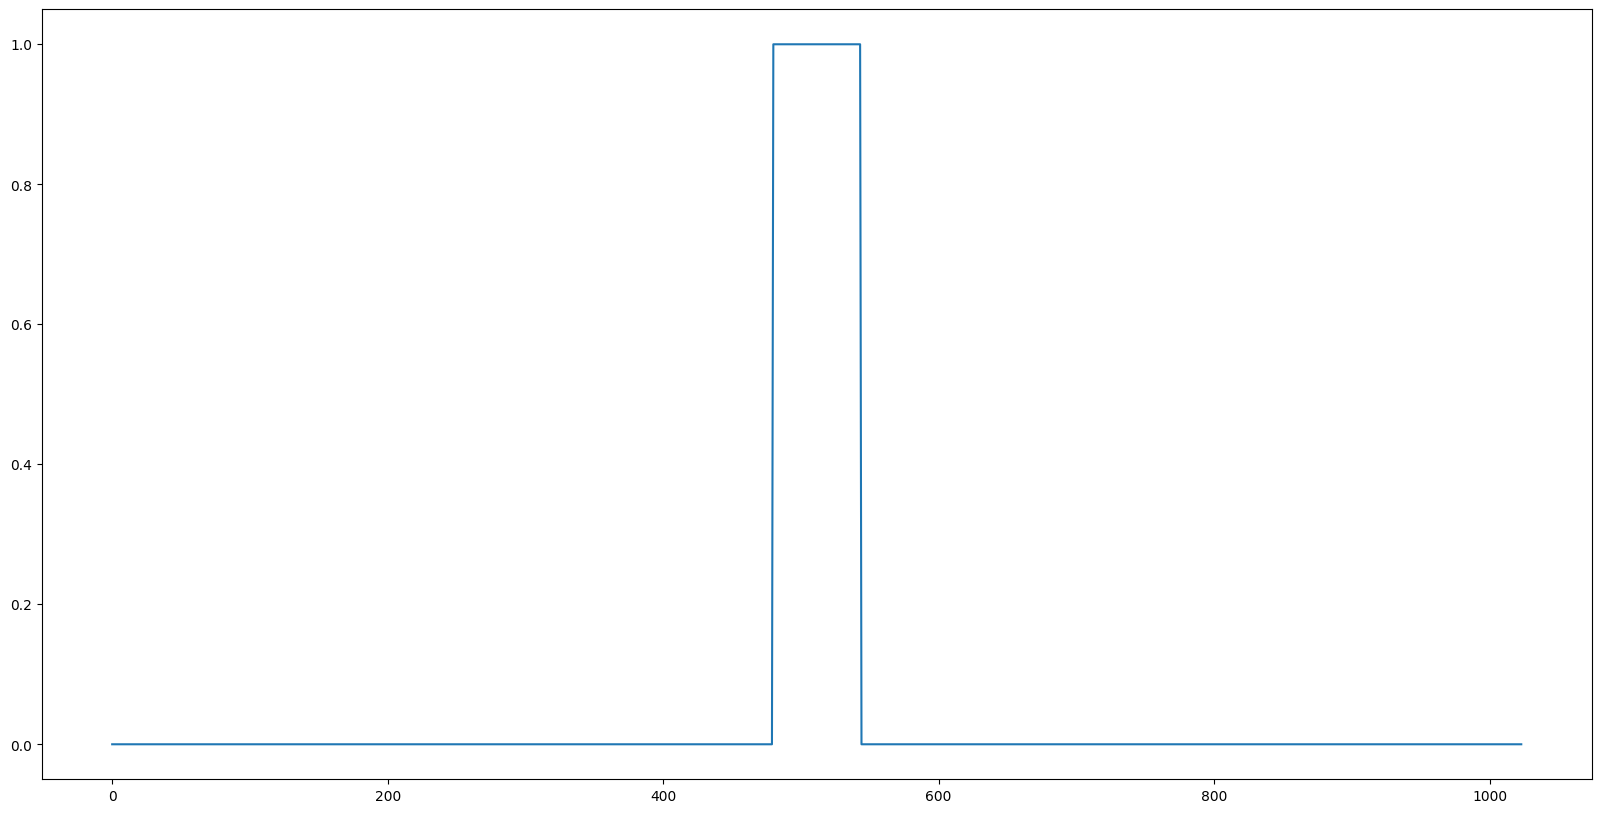

In [8]:
w_rect = np.zeros(1024)
w_rect[480:544] = 1
f3, ax3 = plots()
ax3.plot(w_rect)
plt.show()


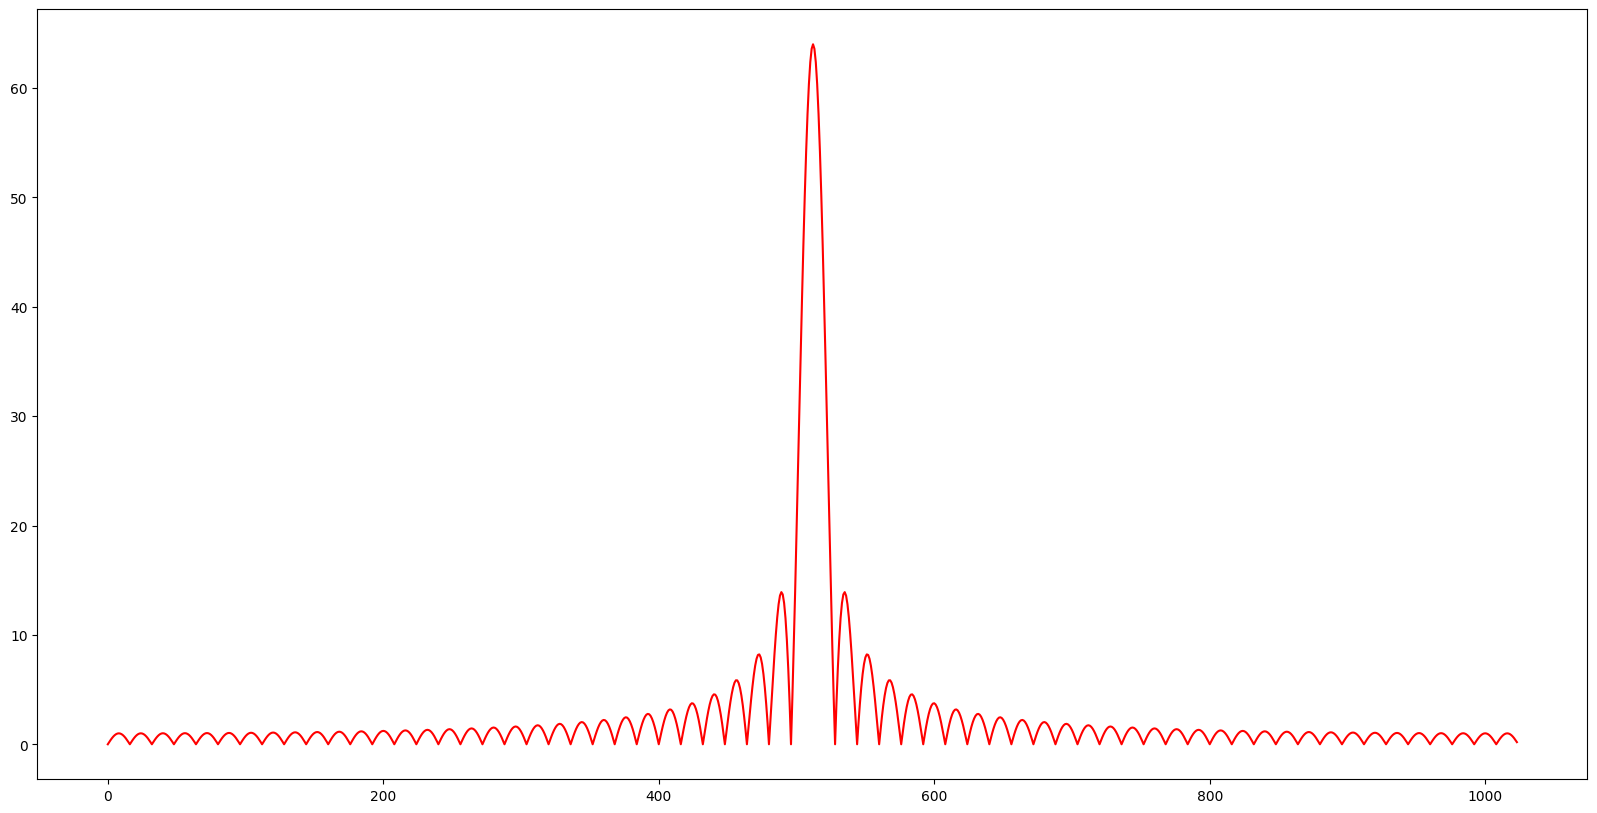

In [6]:
W_rect = fft(w_rect)
f3, ax3 = plots()
ax3.plot(fftshift(abs(W_rect)),'r')
plt.show()

### Triangular

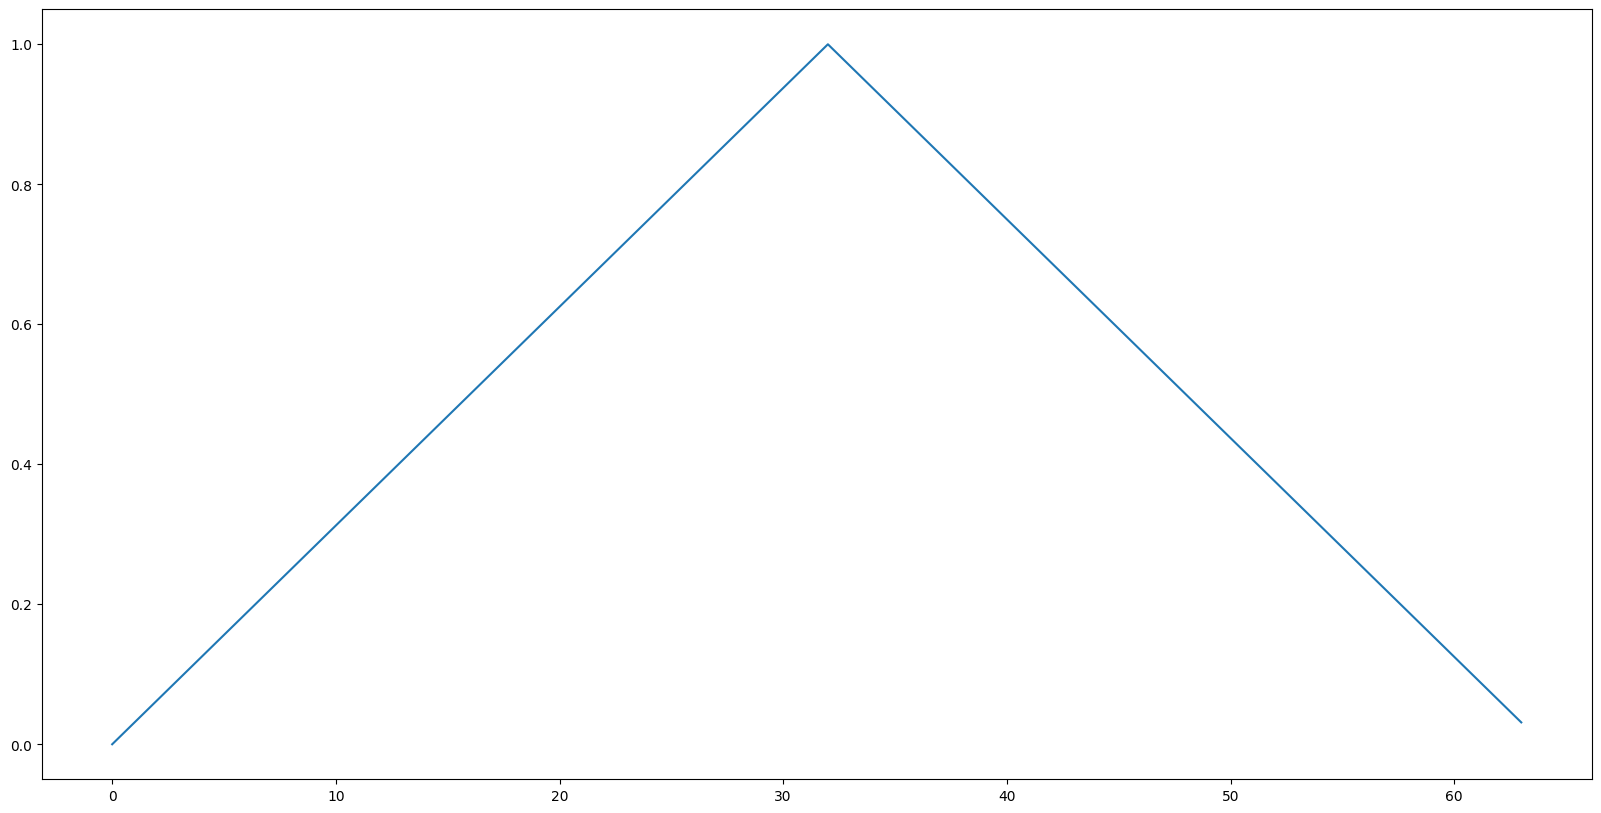

In [12]:
N = 64
n = np.arange(N)

pos_triag = 2/N*n[:33]
neg_triag = 2-2/N*n[33:]
w_triag = np.concatenate((pos_triag, neg_triag))

f4, ax4 = plots()
ax4.plot(w_triag)
plt.show()


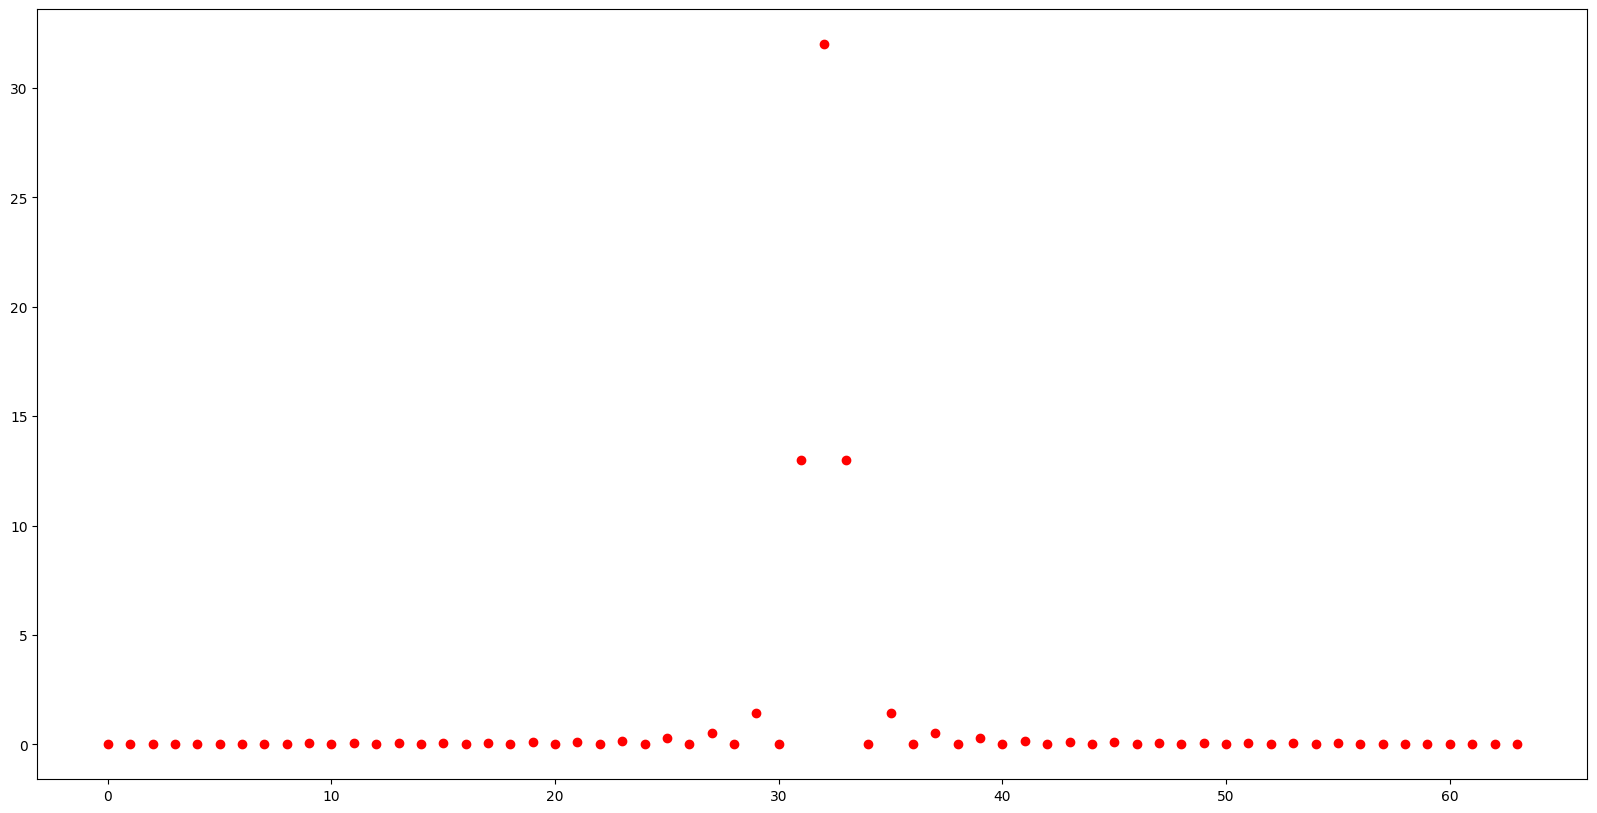

In [23]:
W_triag = fft(w_triag)
f4, ax4 = plots()
ax4.plot(fftshift(abs(W_triag)),'ro')
plt.show()

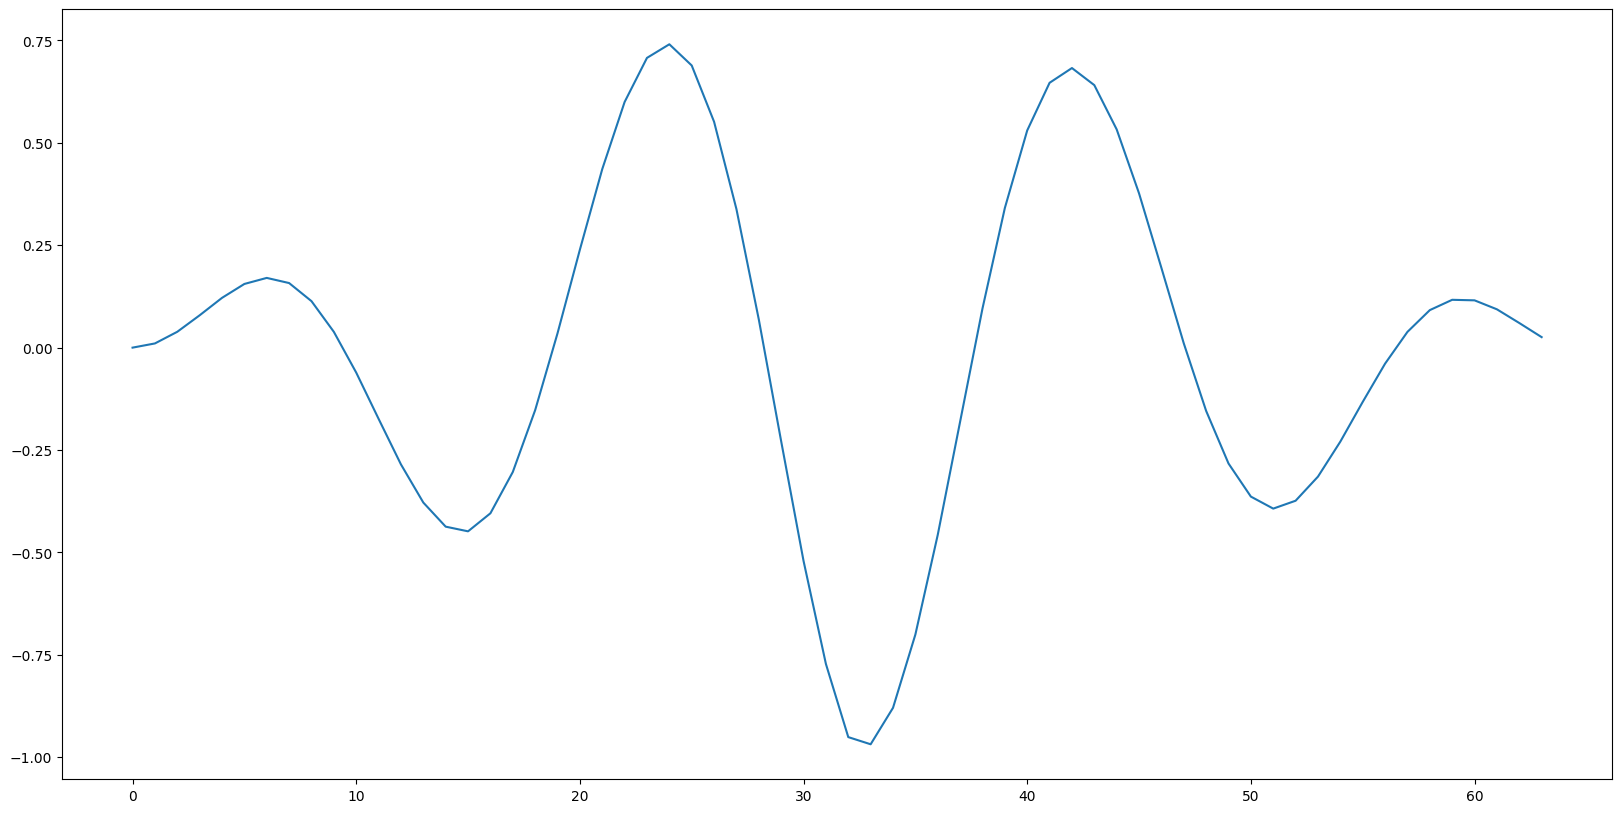

In [20]:
w_x_1 = w_triag*x_1
f4, ax4 = plots()
ax4.plot(w_x_1)
plt.show()

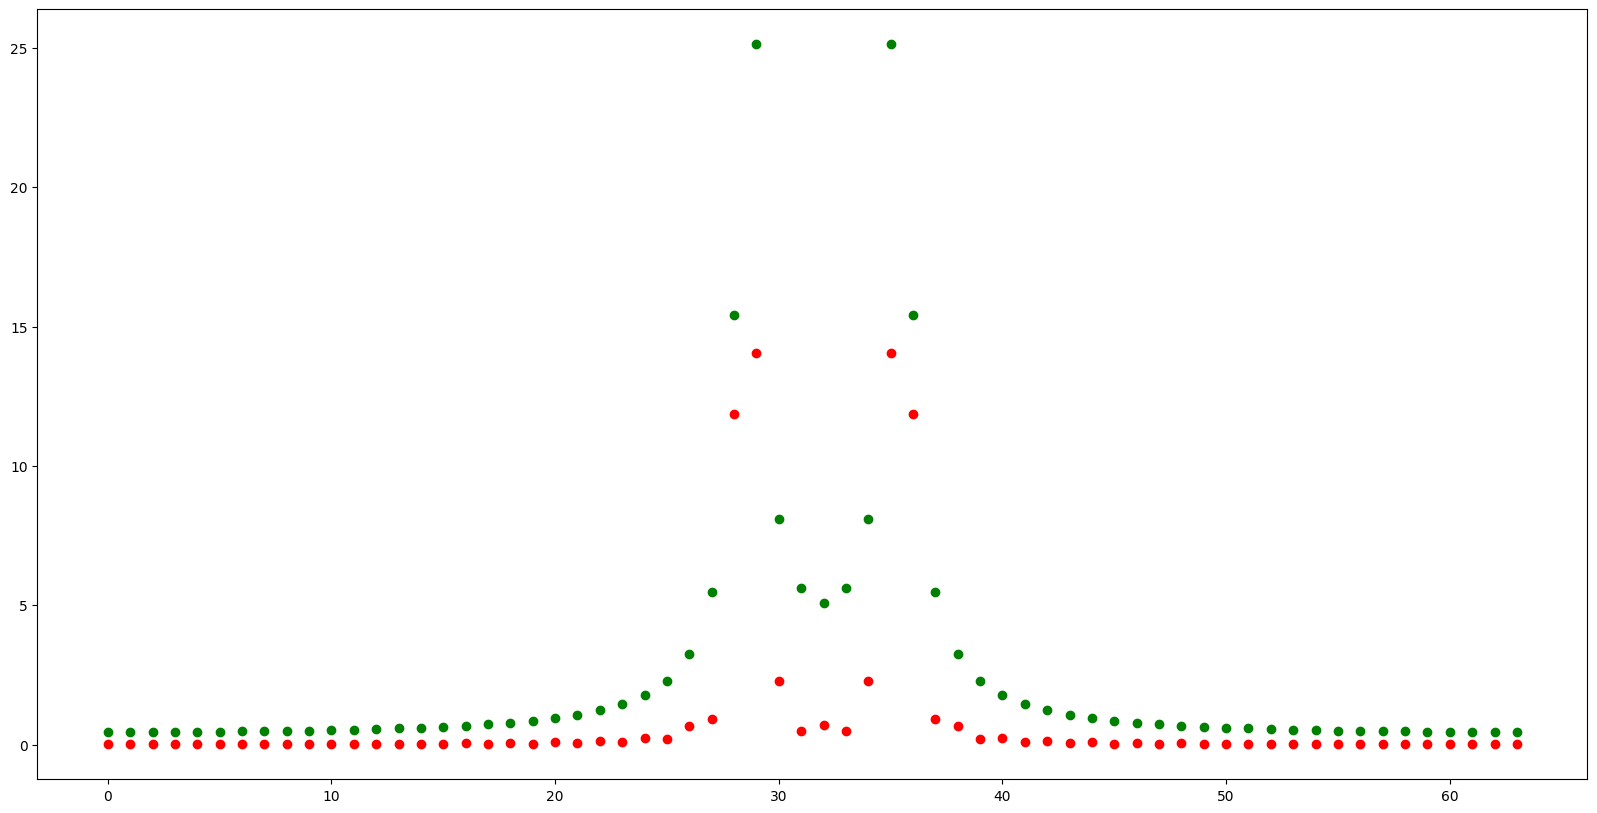

In [24]:
X_w = fft(w_x_1)
f5, ax5 = plots()
ax5.plot(fftshift(abs(X_w)),'ro')
ax5.plot(fftshift(abs(fft(x_1))), 'go')
plt.show()

### Hanning window

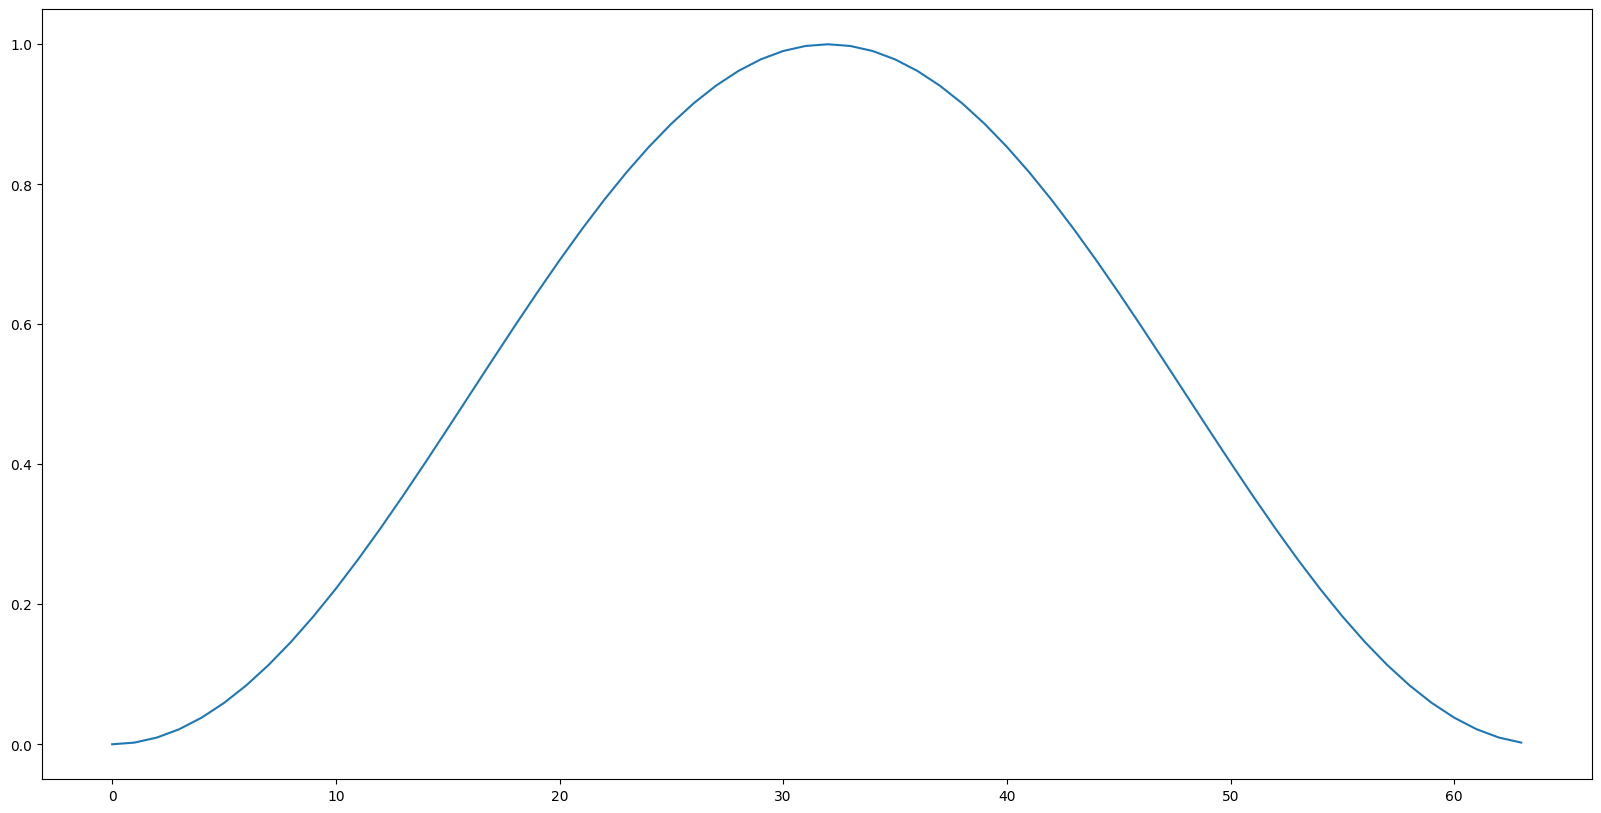

In [29]:
N = 64
n = np.arange(N)
hann_win = 0.5-0.5*cos(2*pi*n/N)
f, ax = plots()
ax.plot(hann_win)
plt.show()

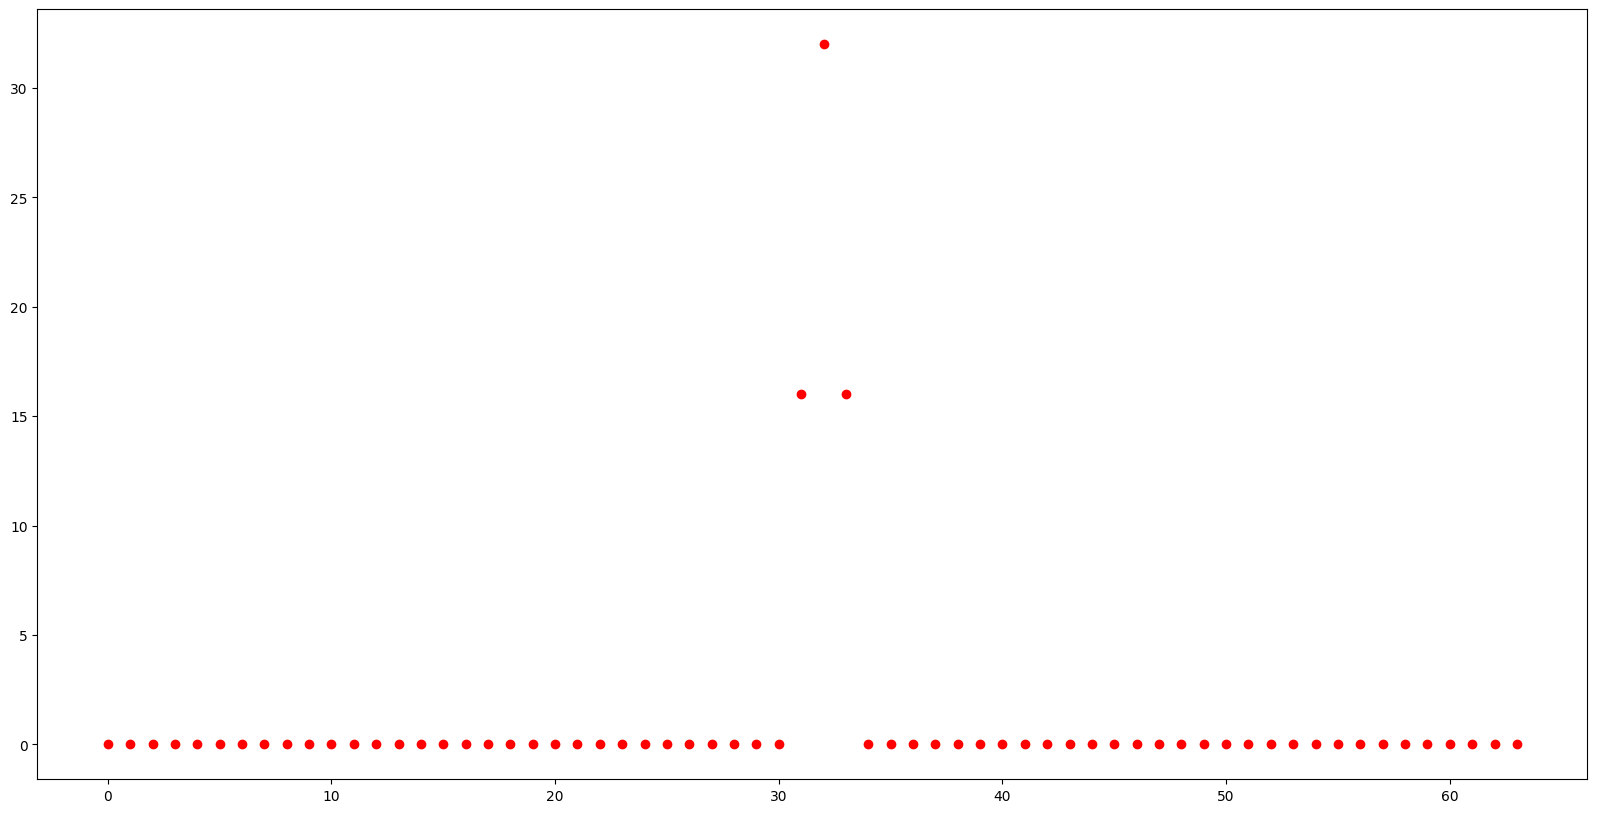

In [32]:
W_hann = fft(hann_win)
f, ax = plots()
ax.plot(fftshift(abs(W_hann)),'ro')
plt.show()

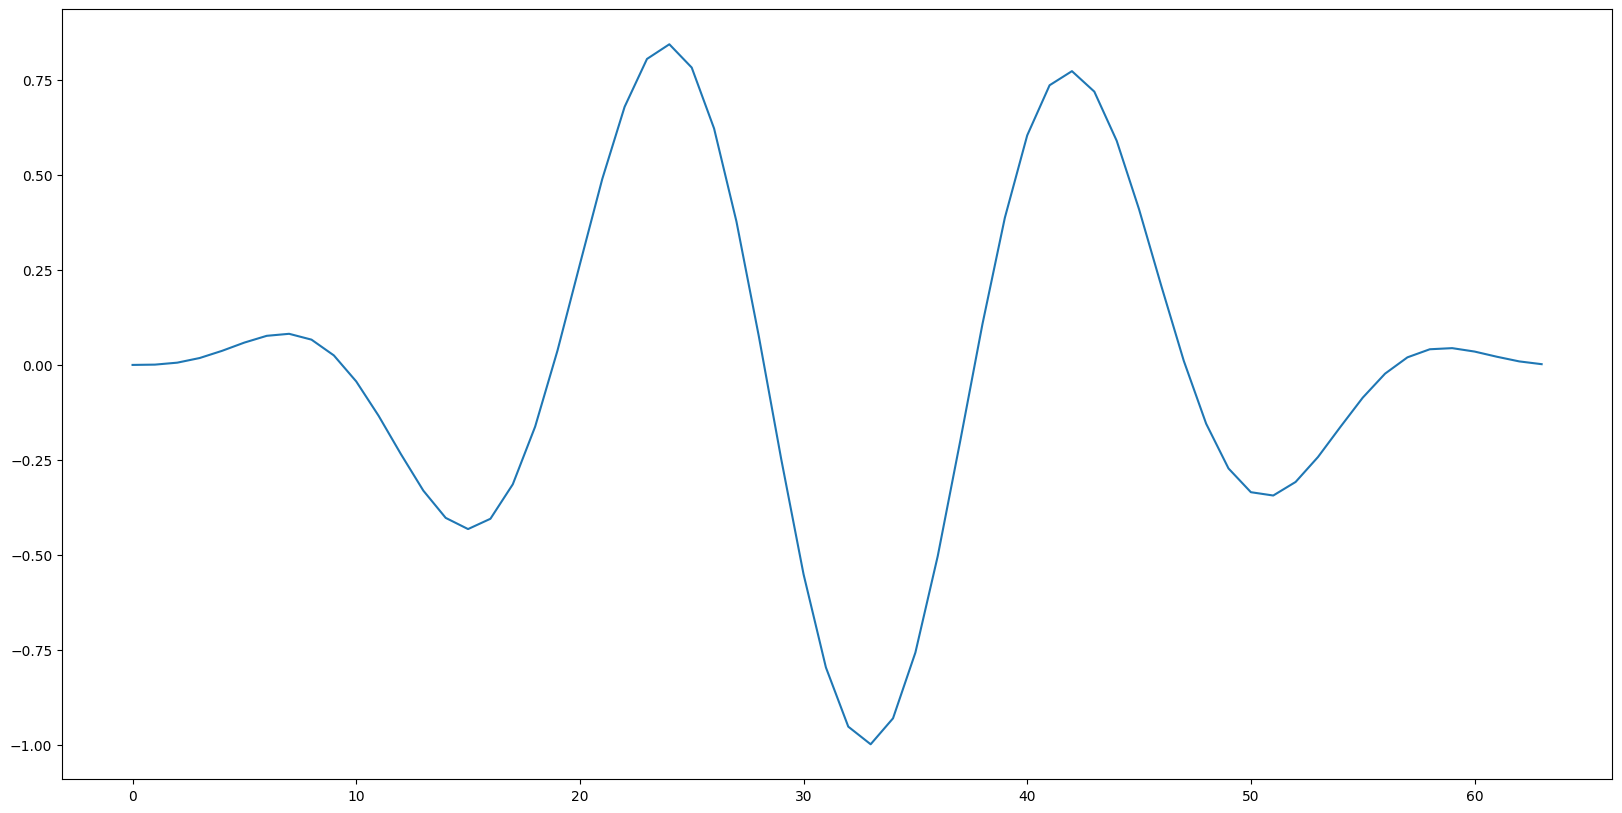

In [33]:
w_x_1 = hann_win*x_1
f, ax = plots()
ax.plot(w_x_1)
plt.show()

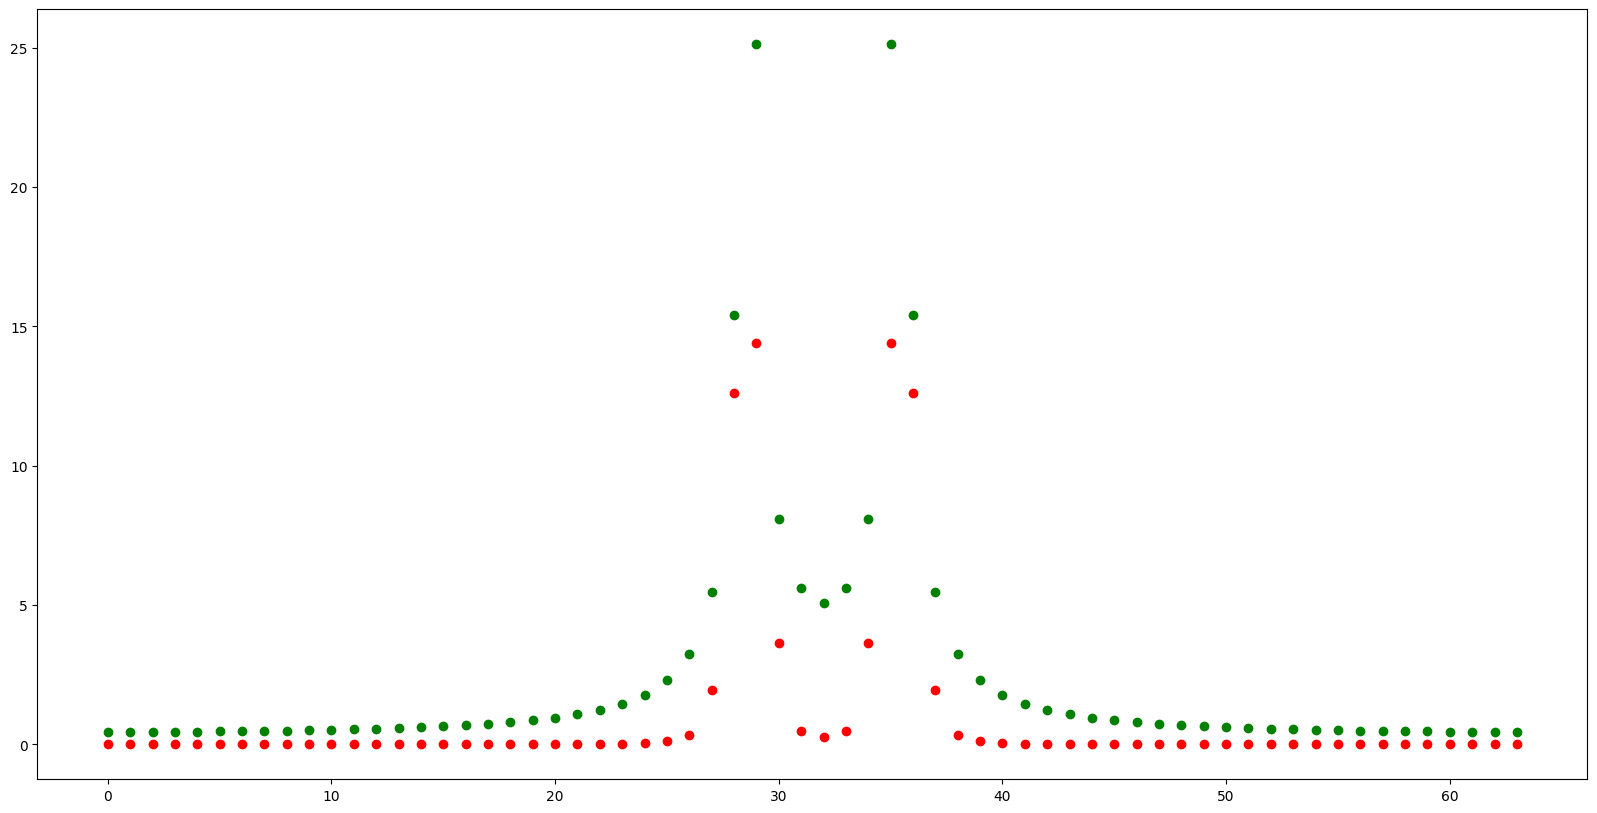

In [37]:
W_x_1 = fft(w_x_1)
f, ax = plots()
ax.plot(fftshift(abs(W_x_1)),'ro')
ax.plot(fftshift(abs(fft(x_1))), 'go')
plt.show()


### Hamming window

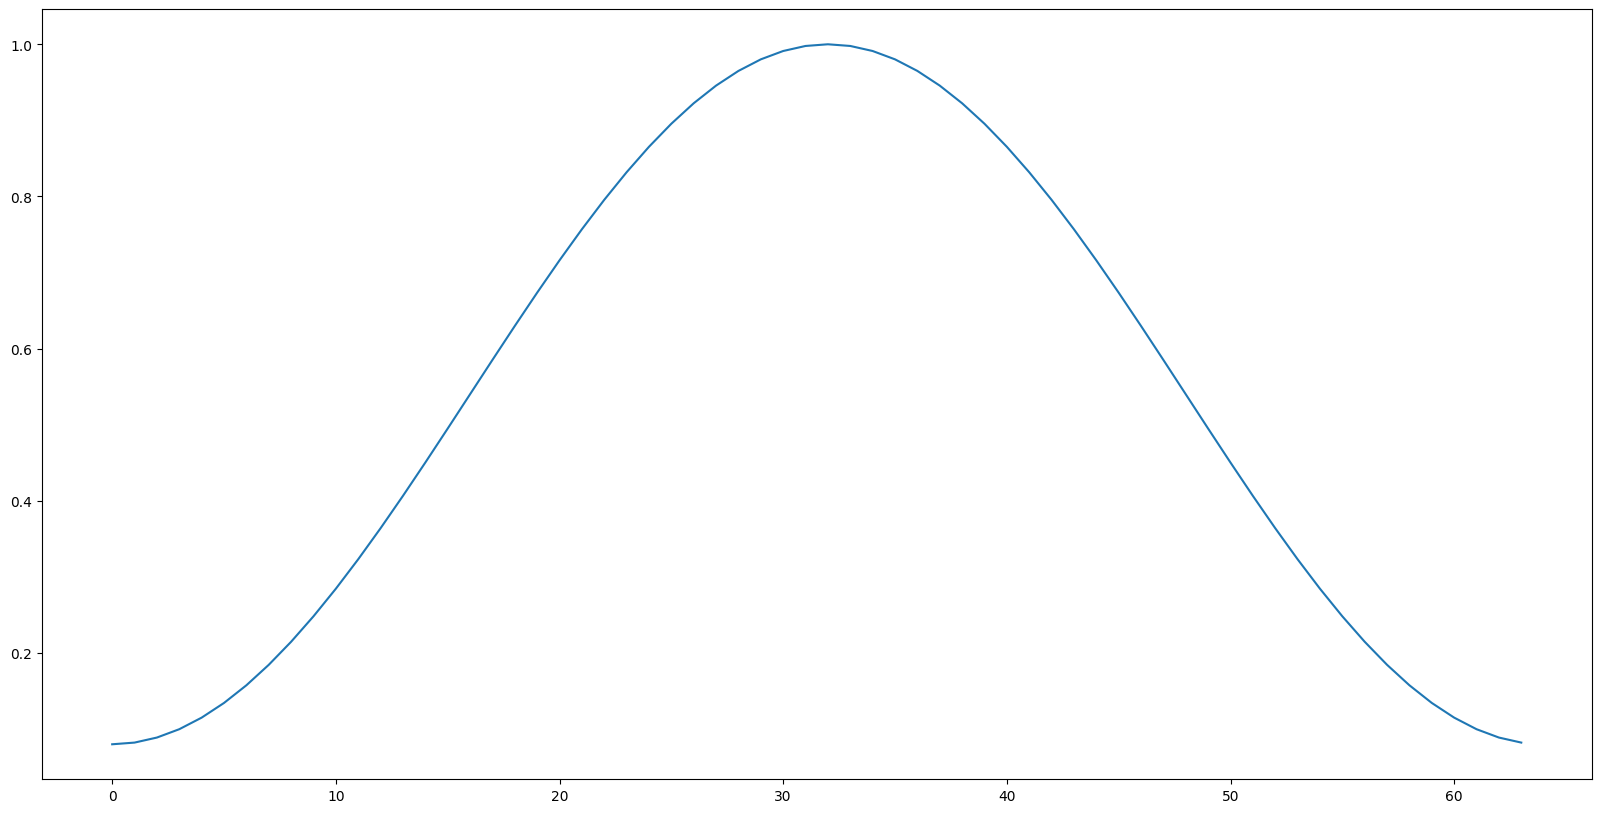

In [38]:
N = 64
n = np.arange(N)
hamm_win = 0.54-0.46*cos(2*pi*n/N)
f, ax = plots()
ax.plot(hamm_win)
plt.show()


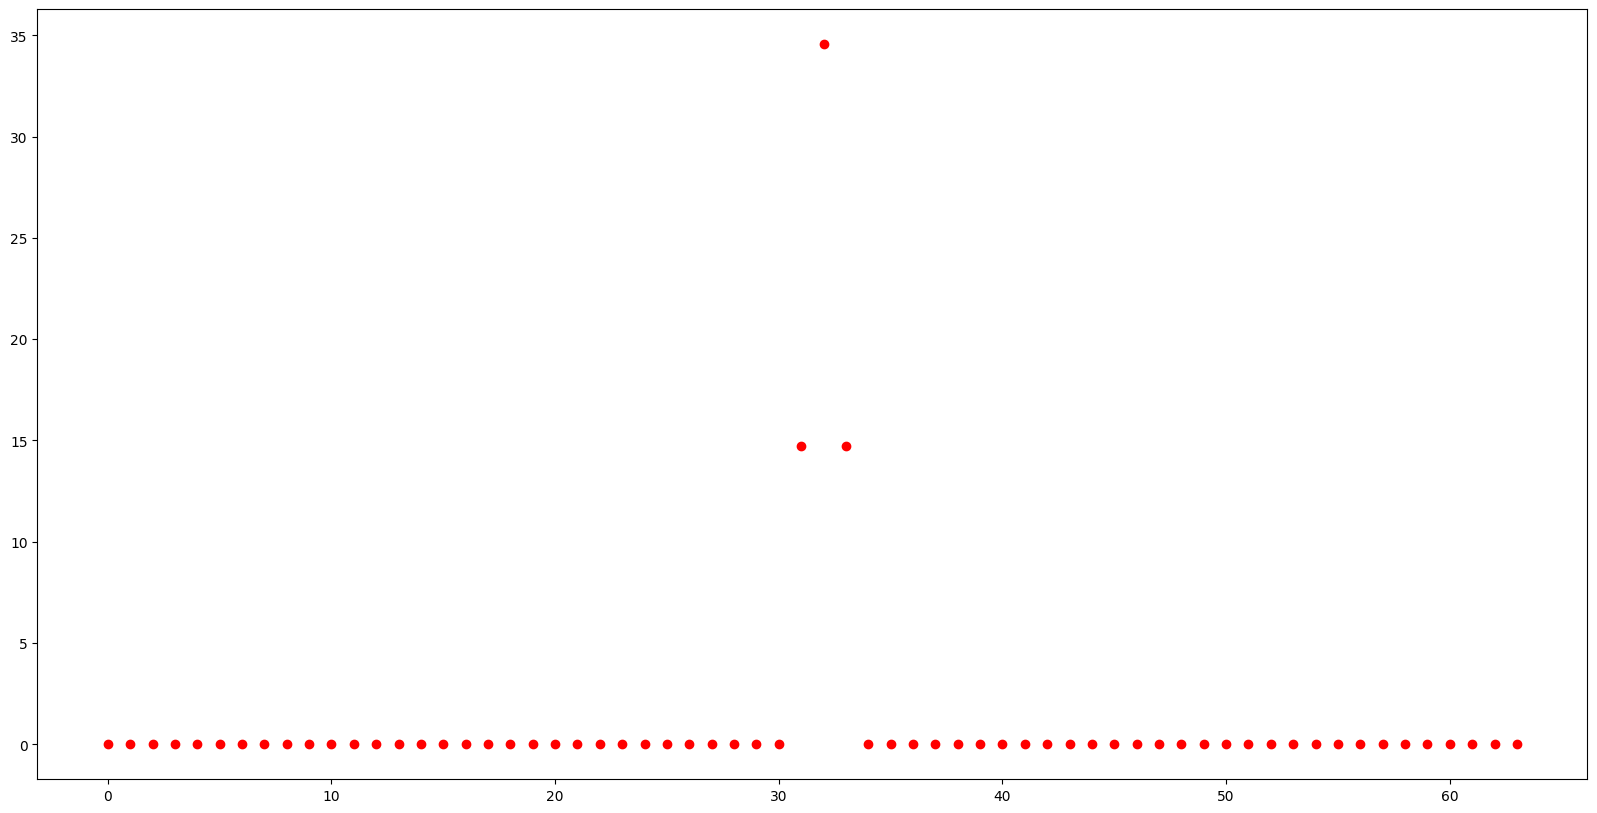

In [40]:
W_hamm = fft(hamm_win)
f, ax = plots()
ax.plot(fftshift(abs(W_hamm)), 'ro')
plt.show()


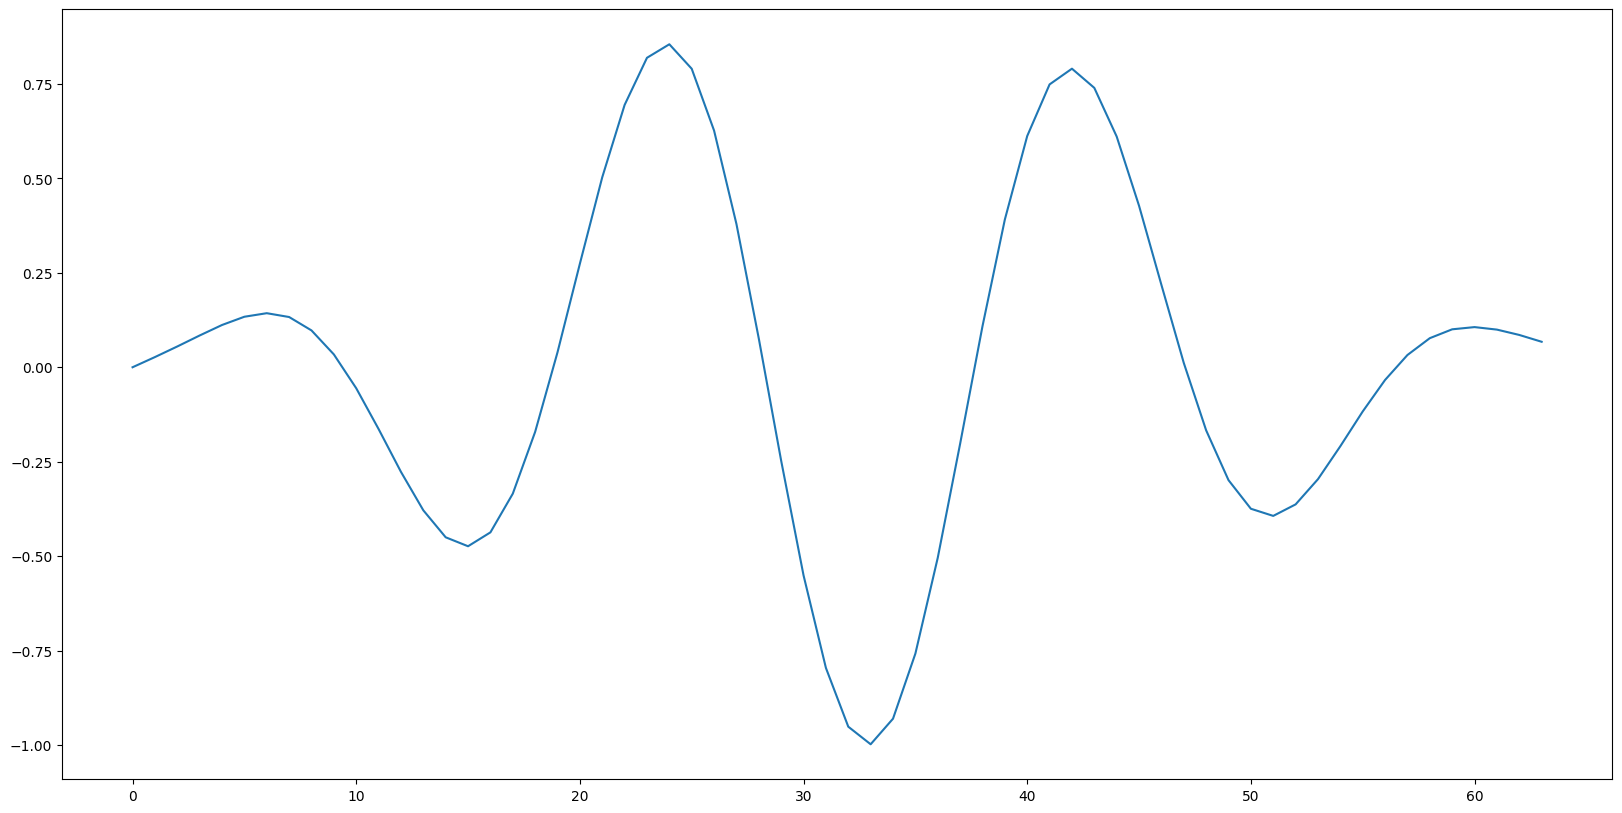

In [41]:
w_x_1 = hamm_win*x_1
f, ax = plots()
ax.plot(w_x_1)
plt.show()

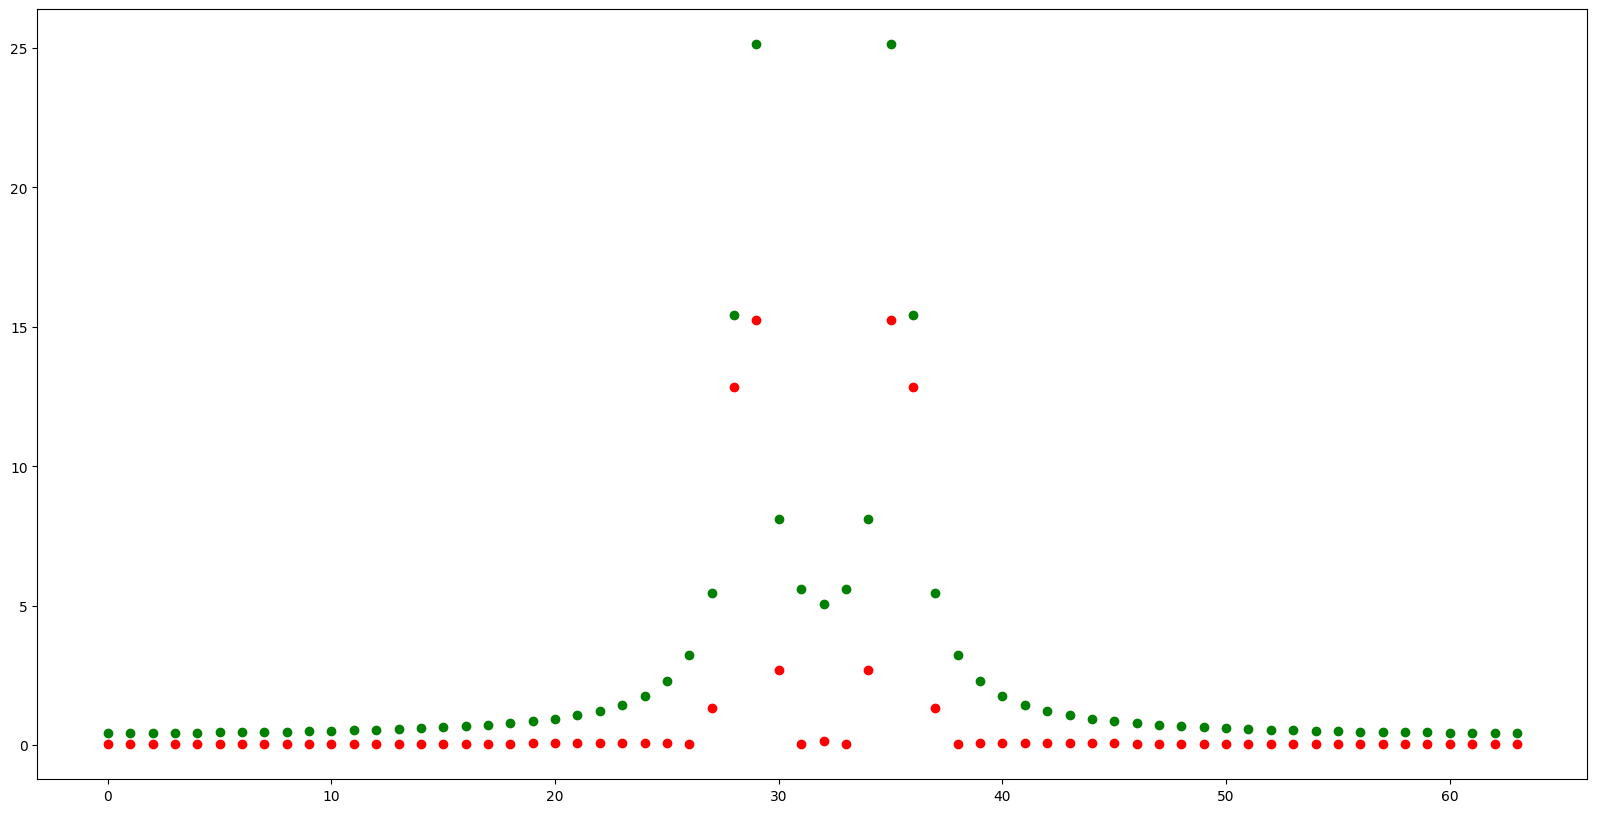

In [42]:
W_x_1 = fft(w_x_1)
f, ax = plots()
ax.plot(fftshift(abs(W_x_1)), 'ro')
ax.plot(fftshift(abs(fft(x_1))), 'go')
plt.show()


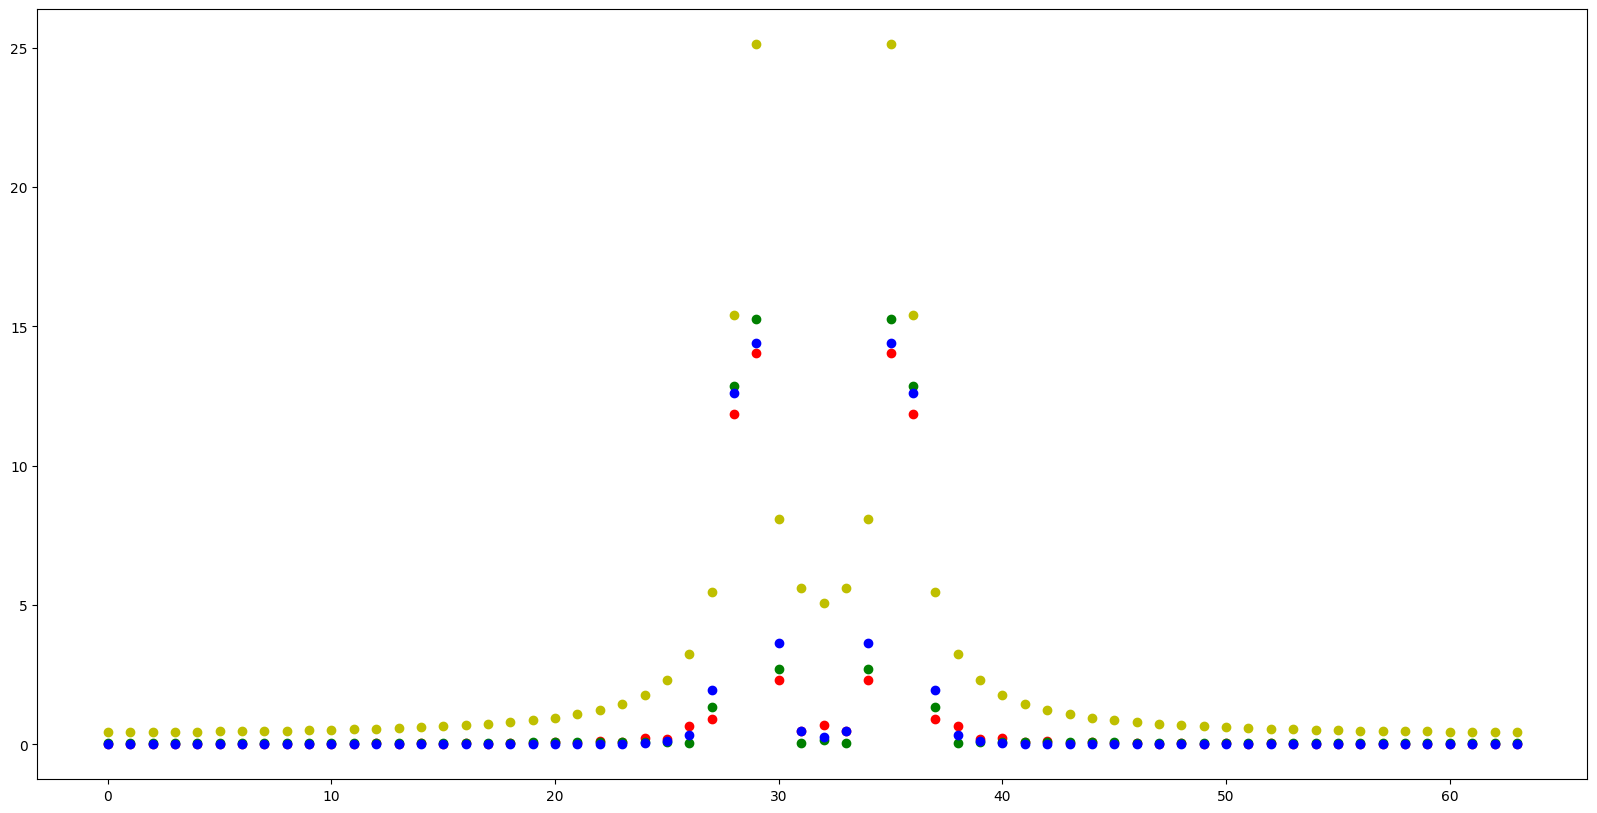

In [50]:
triang_x_1 = x_1*w_triag
hamm_x_1 = x_1*hamm_win
hann_x_1 = x_1*hann_win
X_1 = fft(x_1)

Triang = fft(triang_x_1)
Hamm = fft(hamm_x_1)
Hann = fft(hann_x_1)

f, ax = plots()
ax.plot(fftshift(abs(Triang1)), 'ro')
ax.plot(fftshift(abs(Hamm)), 'go')
ax.plot(fftshift(abs(Hann)), 'bo')
ax.plot(fftshift(abs(X_1)), 'yo')

plt.show()

### Zero padding

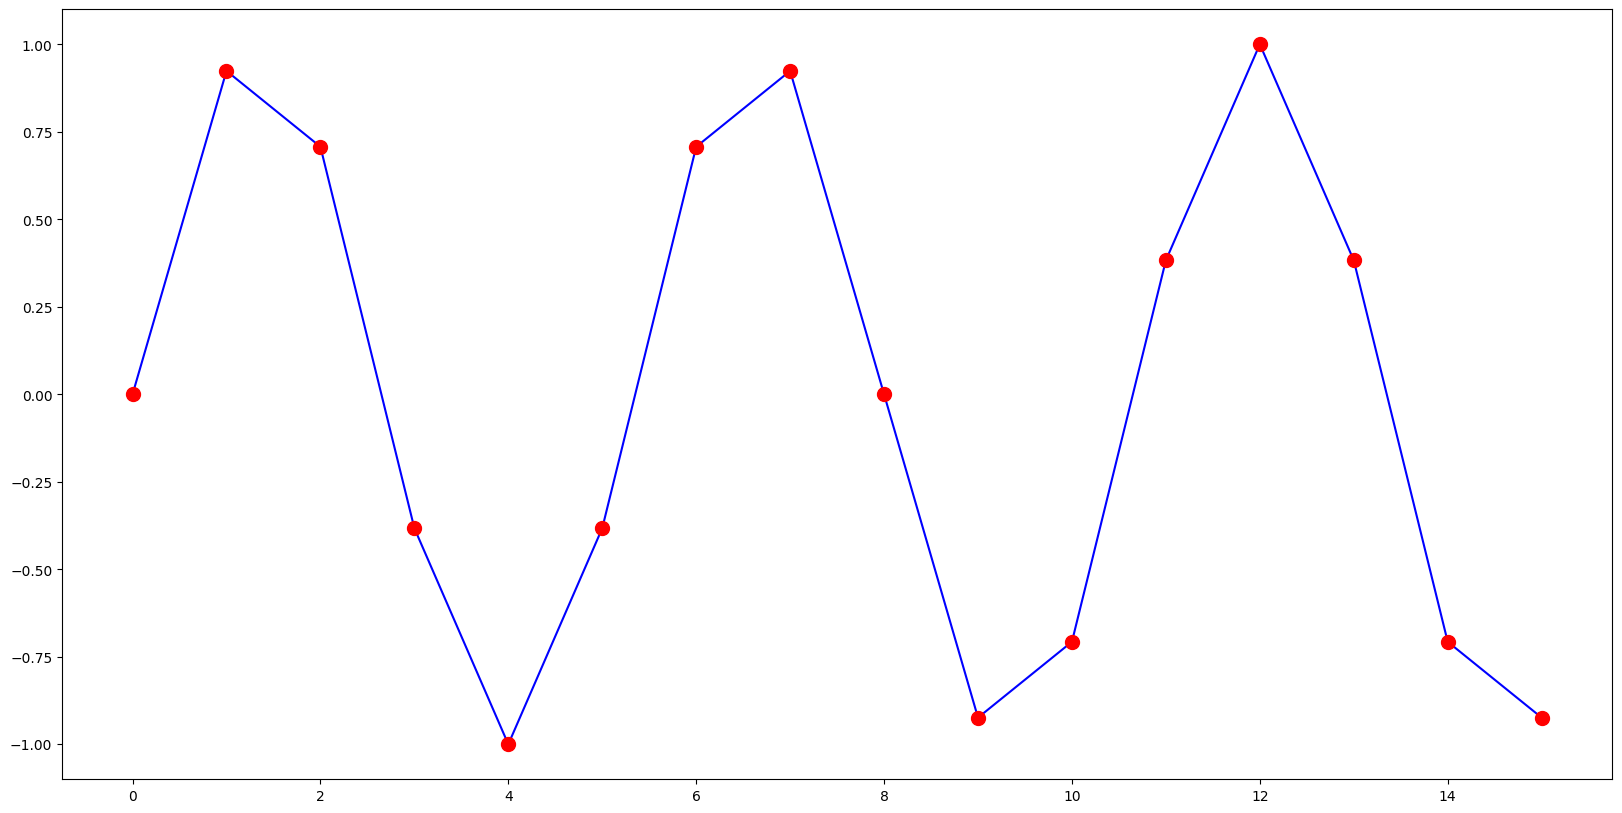

In [59]:
fs = 16
ts = 1/fs
f0_1 = 3

total_time = 1
N = np.arange(fs)
x_1 = np.sin(2*np.pi*f0_1*N*ts)


f, ax = plots()
ax.plot(N,x_1,'b')
ax.plot(N,x_1,'ro', markersize=10)
plt.show()

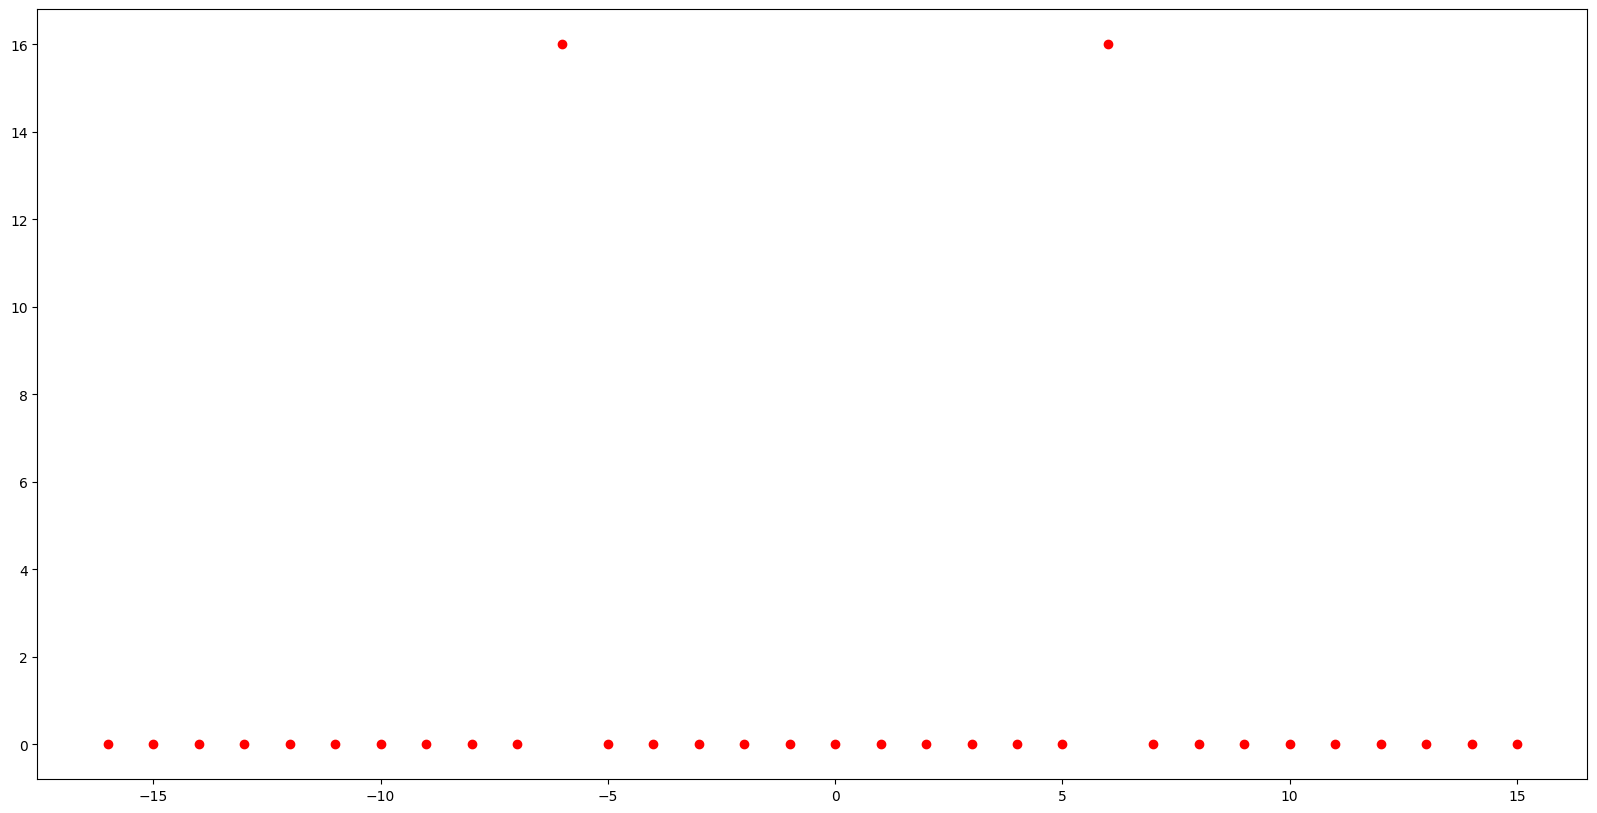

In [58]:
X_1 = fft(x_1)
f, ax = plots()
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'ro')
plt.show()

### Zero Padding

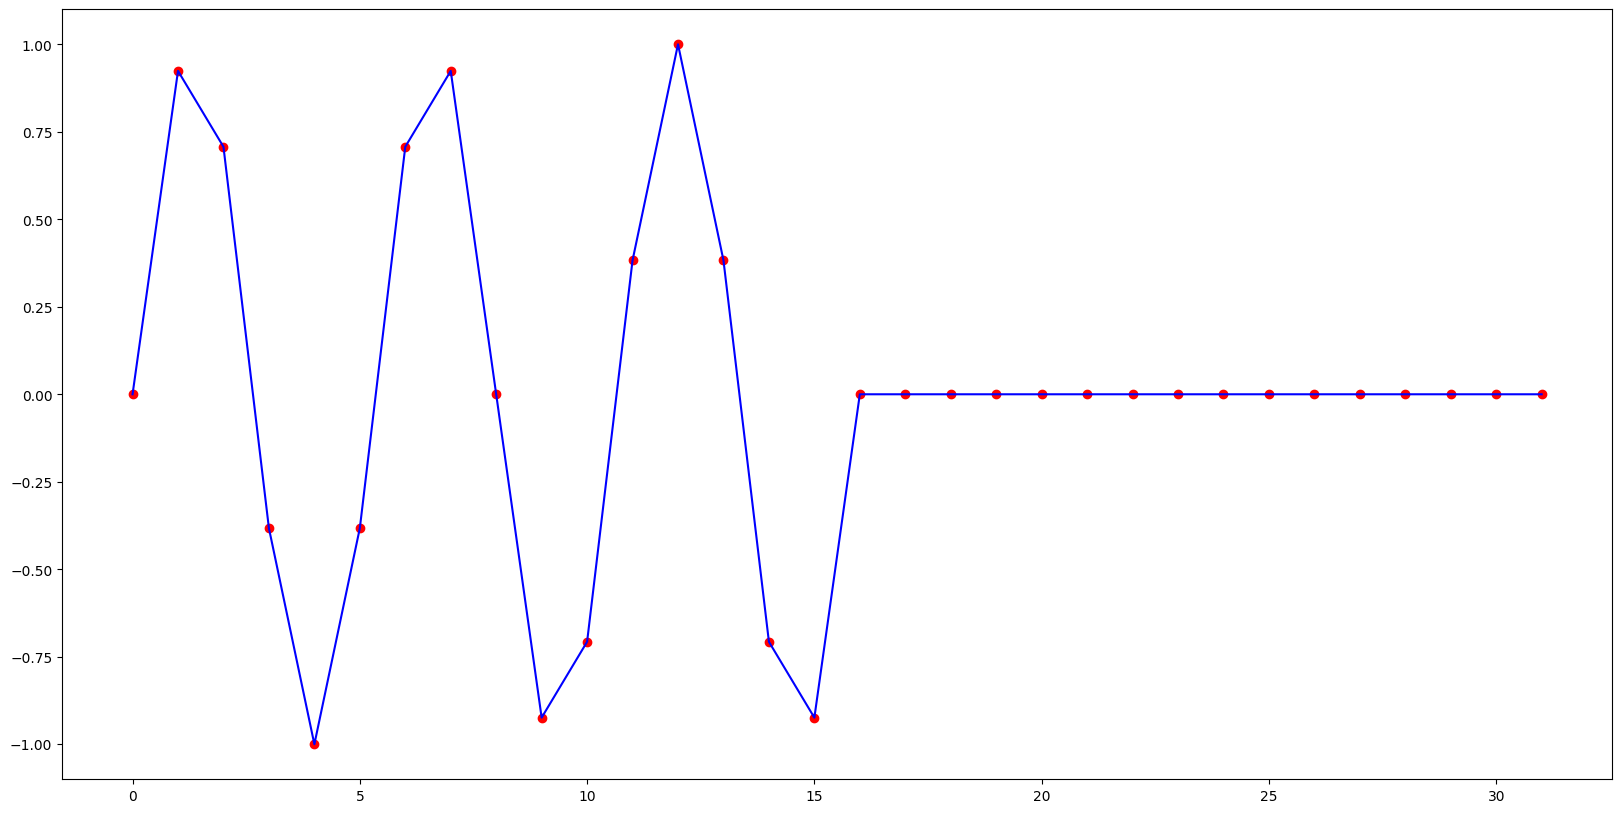

In [64]:
fs = 16
ts = 1/fs
f0_1 = 3

total_time = 1
N = np.arange(fs)
x_1 = np.sin(2*np.pi*f0_1*N*ts)

x_1_32 = np.zeros(32)
x_1_32[:fs] = x_1

f, ax = plots()
ax.plot(x_1_32,'ro')
ax.plot(x_1_32,'b')
plt.show()

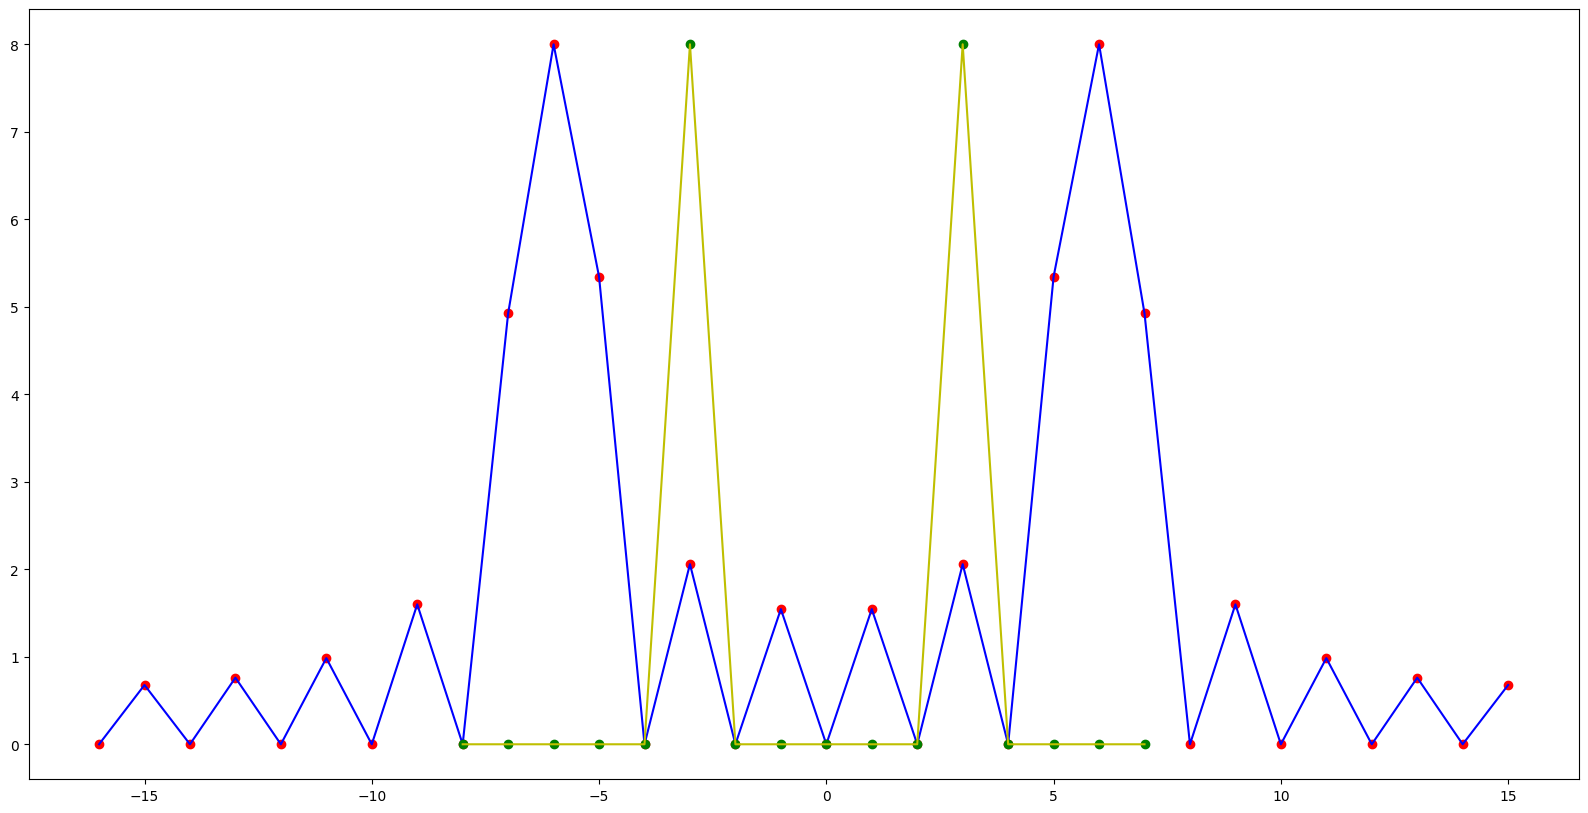

In [72]:
X_1_32 = fft(x_1_32)
X_1 = fft(x_1)
f, ax = plots()
ax.plot(np.arange(-len(X_1_32)/2,len(X_1_32)/2), fftshift(abs(X_1_32)), 'ro')
ax.plot(np.arange(-len(X_1_32)/2,len(X_1_32)/2), fftshift(abs(X_1_32)), 'b')
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'go')
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'y')
plt.show()

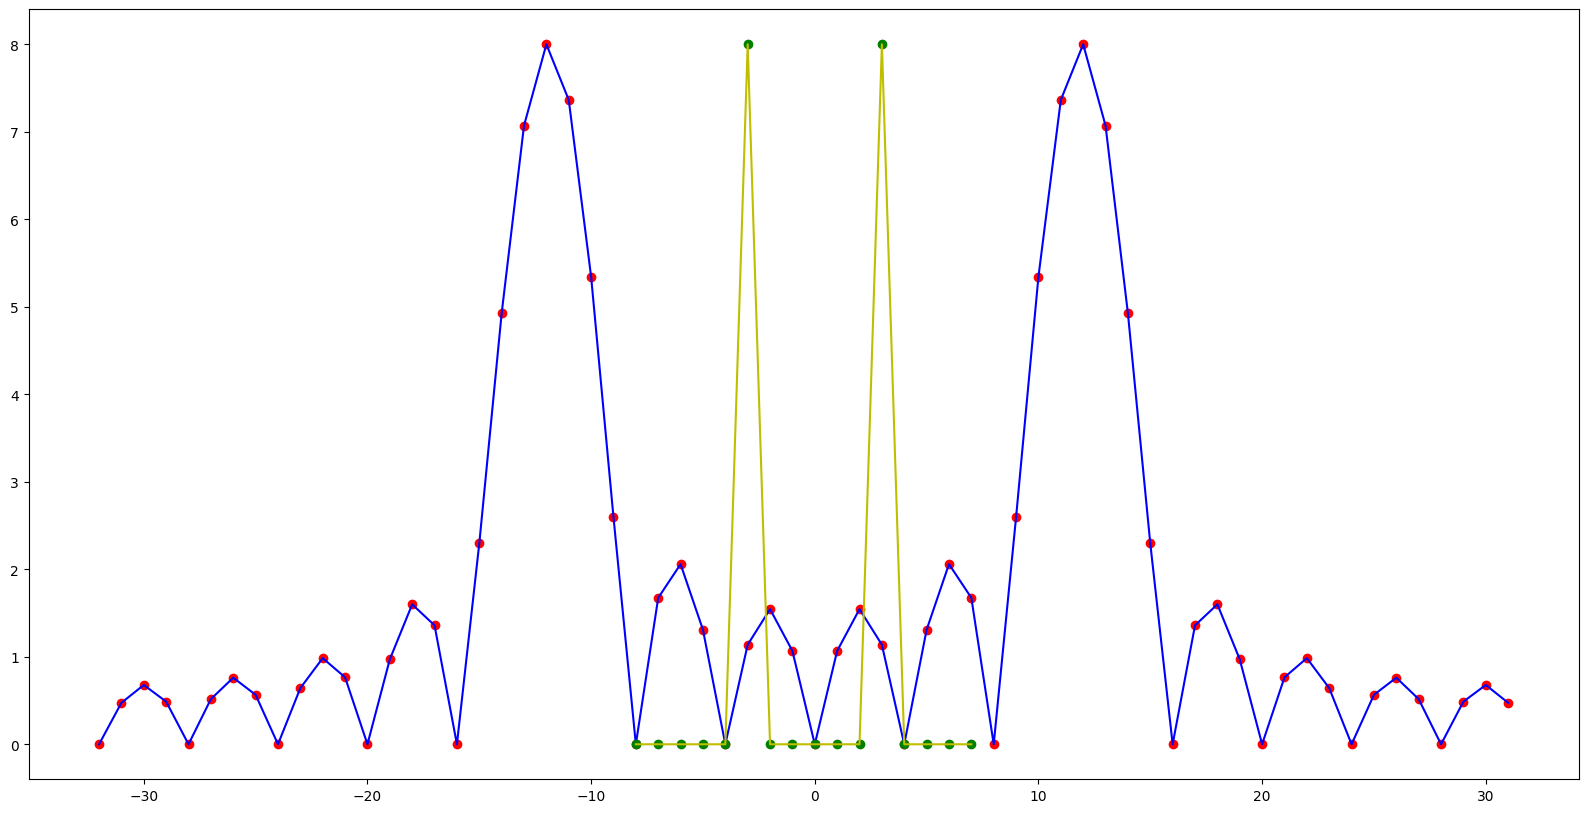

In [73]:
x_1_64 = np.zeros(64)
x_1_64[:fs] = x_1
X_1_64 = fft(x_1_64)
X_1 = fft(x_1)
f, ax = plots()
ax.plot(np.arange(-len(X_1_64)/2,len(X_1_64)/2), fftshift(abs(X_1_64)), 'ro')
ax.plot(np.arange(-len(X_1_64)/2,len(X_1_64)/2), fftshift(abs(X_1_64)), 'b')
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'go')
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'y')
plt.show()

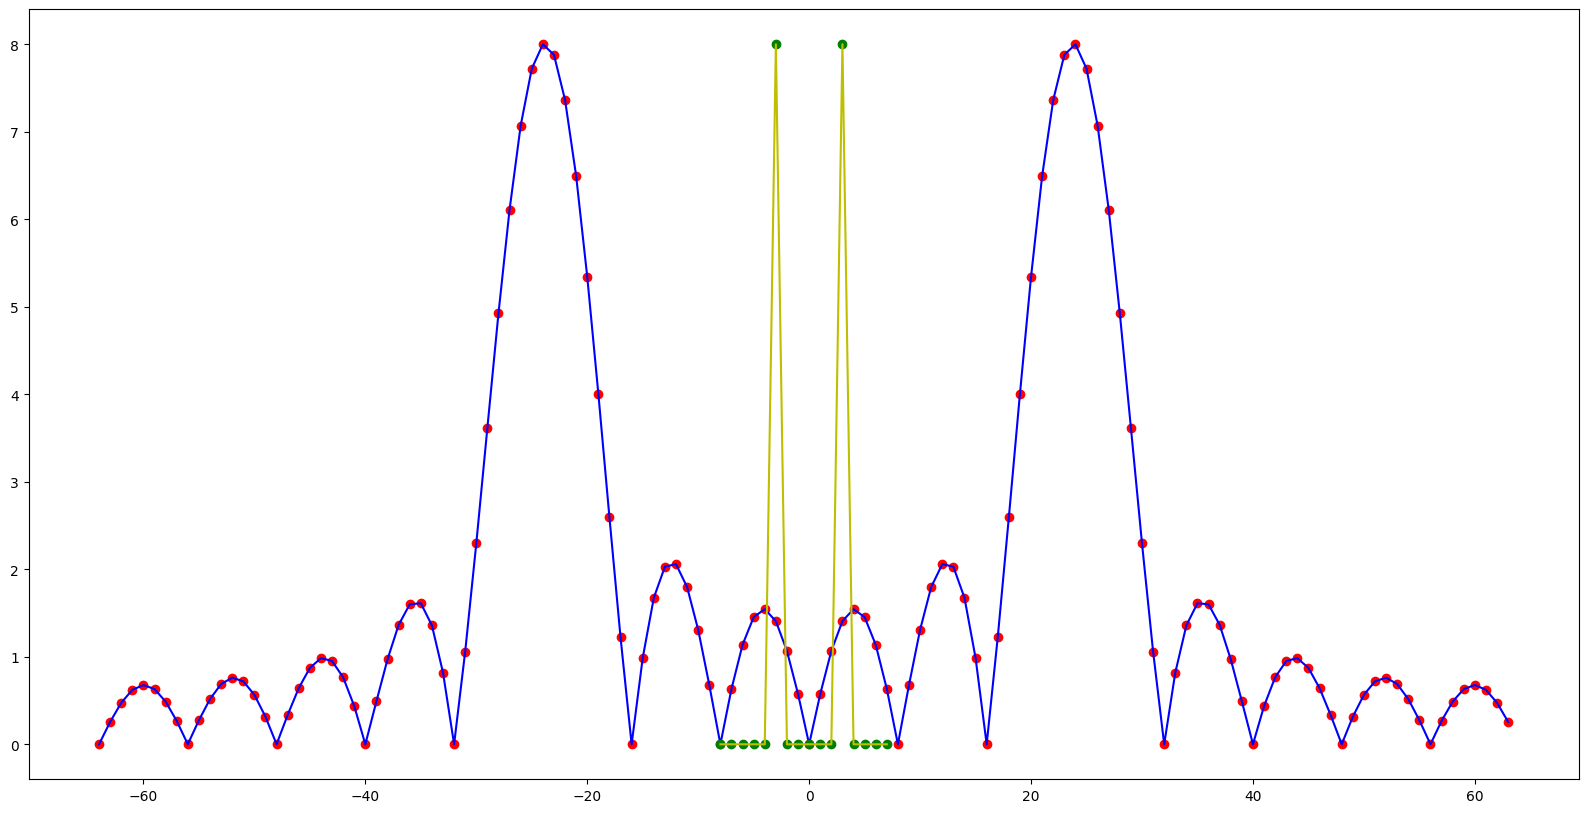

In [75]:
x_1_128 = np.zeros(128)
x_1_128[:fs] = x_1
X_1_128 = fft(x_1_128)
X_1 = fft(x_1)
f, ax = plots()
ax.plot(np.arange(-len(X_1_128)/2,len(X_1_128)/2), fftshift(abs(X_1_128)), 'ro')
ax.plot(np.arange(-len(X_1_128)/2,len(X_1_128)/2), fftshift(abs(X_1_128)), 'b')
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'go')
ax.plot(np.arange(-len(X_1)/2,len(X_1)/2), fftshift(abs(X_1)), 'y')
plt.show()